### Logistic regression and SVM exercise
Exercise to create data to classify men and women based on height and weight. Data was created randomly based on average and standard deviation.

Multiclass classification was also added as second part of exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from random import *
import random

%matplotlib inline

## Creating data

- Create sample of random numbers (0 or 1 only).
- For each point, create height and weight, normal distributed with average and std declared.

In [2]:
# function that return 0 or 1 for certain number of trials
sex = lambda n: [randint(0,1) for b in range(1,n+1)]

In [3]:
# let's simulate 200 people
sex_list = sex(200)

In [4]:
female_count = sex_list.count(0)
male_count = sex_list.count(1)
print "Number of random females produced:", sex_list.count(0)
print "Number of random males produced:", sex_list.count(1)

Number of random females produced: 104
Number of random males produced: 96


In [5]:
# Creating distribution. 
# male hieght: mean 1.78, std 0.10 - weight: mean 70, std 5
# female hieght: mean 1.68, std 0.07 - weight: mean 57, std 4
male_height = (0.10*np.random.randn(1, male_count) + 1.78)*100
female_height = (0.07*np.random.randn(1, female_count) + 1.68)*100
male_wei = 5*np.random.randn(1, male_count) + 70
female_wei = 4*np.random.randn(1, female_count) + 57

In [6]:
# Transforming arrays into lists
mh = []
mw = []
for i in range(0, male_count):
    mh.append(male_height[0][i])
    mw.append(male_wei[0][i])
fh = []
fw = []
for i in range(0, female_count):
    fh.append(female_height[0][i])
    fw.append(female_wei[0][i])

### Creating dataframe to visualize data

In [7]:
# Creating dataframes
malepd = pd.DataFrame({'Sex': np.ones(male_count), 'height': mh, 'weight': mw})
femalepd = pd.DataFrame({'Sex': np.zeros(female_count), 'height': fh, 'weight': fw})

In [8]:
# Stacking male and female distribution
frame = malepd.append(femalepd)

In [9]:
frame = frame.reset_index(drop=True)
frame.head()

,Sex,height,weight
0,1.0,169.788918,71.303189
1,1.0,191.353076,68.245836
2,1.0,177.784716,69.437403
3,1.0,161.669880,74.331670
4,1.0,183.408616,62.965502


In [10]:
dic = {1.0: 'M', 0.0: 'F'}

In [11]:
# Input with class names
inp = frame.replace({"Sex": dic})
inp.head()

,Sex,height,weight
0,M,169.788918,71.303189
1,M,191.353076,68.245836
2,M,177.784716,69.437403
3,M,161.669880,74.331670
4,M,183.408616,62.965502


### Visualizing data

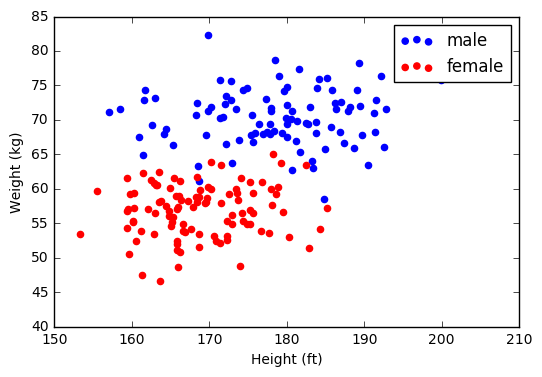

In [12]:
plt.figure()
plt.scatter(frame[frame['Sex'] == 1]['height'], frame[frame['Sex'] == 1]['weight'], color='blue', label = 'male')
plt.scatter(frame[frame['Sex'] == 0]['height'], frame[frame['Sex'] == 0]['weight'], color='red', label = 'female')
plt.xlabel('Height (ft)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

## Using logistic Regression to predict class

In [13]:
# Creating arrays to prediction method
X = frame.iloc[:,1:3].values
y = frame.iloc[:, 0].values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/Users/adrianoyoshino/anaconda/envs/snakes/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.fit_transform(X)

In [16]:
# Training model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Fitting model on test dataset
y_pred = classifier.predict(X) 
y_pred_lrtest = classifier.predict(X_test)

In [18]:
# Confusion matrix for test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lrtest)
print cm

[[26  2]
 [ 0 22]]


In [19]:
# Confusion matrix for full dataset
cm_lr = confusion_matrix(y, y_pred)
print cm_lr

[[100   4]
 [  4  92]]


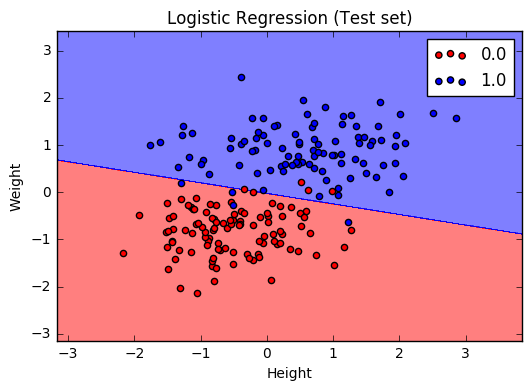

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

### Using SVM

In [28]:
# training SVM Classifier model with traning set
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 0.5)
svm.fit(X_train, y_train)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
# Fitting test set on the model
y_pred_svm_test = svm.predict(X_test)
y_pred_svm = svm.predict(X)


In [30]:
# Confusion matrix for test set and full dataset
cm_svm_test = confusion_matrix(y_test, y_pred_svm_test)
print "Test set: \n", cm_svm_test
cm_svm = confusion_matrix(y, y_pred_svm)
print "Total dataset: \n", cm_svm

Test set: 
[[26  2]
 [ 0 22]]
Total dataset: 
[[101   3]
 [  4  92]]


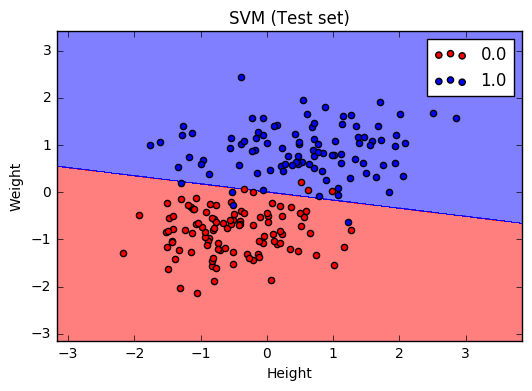

In [31]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

### Comparing methods

- Logistic regression: 8 errors over 200 data points
- SVM: 7 errors over 200 data points


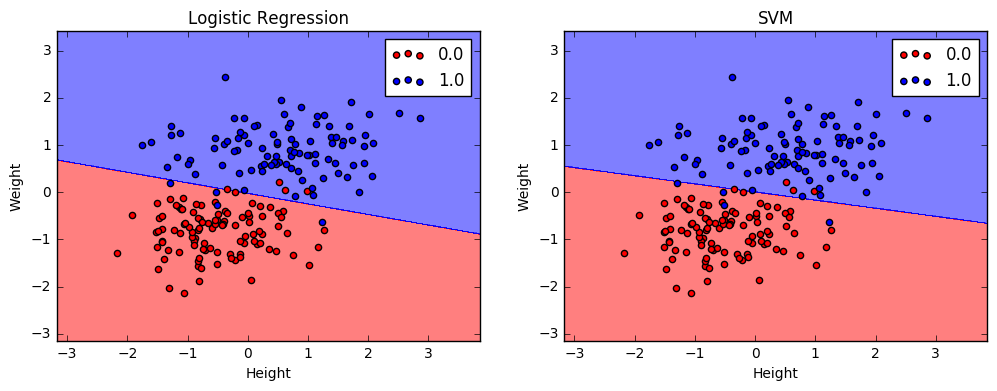

In [32]:
# Comparing methods
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

fig.add_subplot(122)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.show()

## Multiclass case
3 population classification

### Creating data

In [50]:
# function that return 0 or 1 or 2for certain number of trials
number = 200
pop = []
for i in range(0, number):
    population = np.random.randint(low = 0, high = 3)
    pop.append(population)

In [51]:
print "count of 0:", pop.count(0)
print "count of 1:", pop.count(1)
print "count of 2:", pop.count(2)

count of 0: 60
count of 1: 72
count of 2: 68


In [52]:
# Creating distribution. 
# c0 hieght: mean 1.79, std 0.05 - weight: mean 75, std 4
# c1 hieght: mean 1.55, std 0.07 - weight: mean 55, std 4
# c2 hieght: mean 1.67, std 0.06 - weight: mean 70, std 6
c0_height = (0.05*np.random.randn(1, pop.count(0)) + 1.79)*100
c1_height = (0.07*np.random.randn(1, pop.count(1)) + 1.55)*100
c2_height = (0.06*np.random.randn(1, pop.count(2)) + 1.67)*100
c0_wei = 4*np.random.randn(1, pop.count(0)) + 75
c1_wei = 4*np.random.randn(1, pop.count(1)) + 55
c2_wei = 6*np.random.randn(1, pop.count(2)) + 70

# Transforming arrays into lists
c0h = []
c0w = []
for i in range(0, pop.count(0)):
    c0h.append(c0_height[0][i])
    c0w.append(c0_wei[0][i])
c1h = []
c1w = []
for i in range(0, pop.count(1)):
    c1h.append(c1_height[0][i])
    c1w.append(c1_wei[0][i])
c2h = []
c2w = []
for i in range(0, pop.count(2)):
    c2h.append(c2_height[0][i])
    c2w.append(c2_wei[0][i])

In [53]:
# Creating DataFrame
two = np.ones(pop.count(2))*2
c0pd = pd.DataFrame({'Class': np.ones(pop.count(0)), 'Height': c0h, 'Weight': c0w})
c1pd = pd.DataFrame({'Class': np.zeros(pop.count(1)), 'Height': c1h, 'Weight': c1w})
c2pd = pd.DataFrame({'Class': two, 'Height': c2h, 'Weight': c2w})
# Stacking male and female distribution
frameMC = c0pd.append(c1pd)
frameMC = frameMC.append(c2pd)
frameMC = frameMC.reset_index(drop=True)
frameMC.head()

,Class,Height,Weight
0,1.0,184.608937,73.225074
1,1.0,180.844976,74.898910
2,1.0,178.668297,75.304822
3,1.0,188.709863,70.938628
4,1.0,181.586922,75.548009


### VIsualizing data

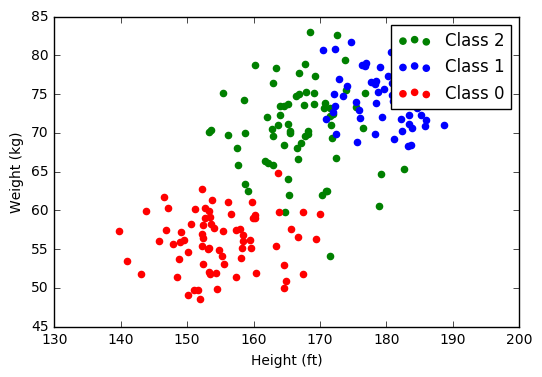

In [54]:
plt.figure()
plt.scatter(frameMC[frameMC['Class'] == 2]['Height'], frameMC[frameMC['Class'] == 2]['Weight'], color='green', label = 'Class 2')
plt.scatter(frameMC[frameMC['Class'] == 1]['Height'], frameMC[frameMC['Class'] == 1]['Weight'], color='blue', label = 'Class 1')
plt.scatter(frameMC[frameMC['Class'] == 0]['Height'], frameMC[frameMC['Class'] == 0]['Weight'], color='red', label = 'Class 0')
plt.xlabel('Height (ft)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

### Logistic Regression

In [55]:
X = frameMC.iloc[:,1:].values
y = frameMC.iloc[:,0].values

In [56]:
# creating tran and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.fit_transform(X)

In [58]:
# Training model
lrmc = LogisticRegression()
lrmc.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
# Fitting model to test set
y_pred_LRMC = lrmc.predict(X_test)
confusion_matrix(y_test, y_pred_LRMC)

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 2,  3, 12]])

In [60]:
# Fitting model to full set
y_pred_LRMC_full = lrmc.predict(X)
confusion_matrix(y, y_pred_LRMC_full)

array([[71,  0,  1],
       [ 0, 57,  3],
       [ 9, 12, 47]])

For the entire dataset there are 25 errors out of 200. The majority of errors are class 2 classified as class 3

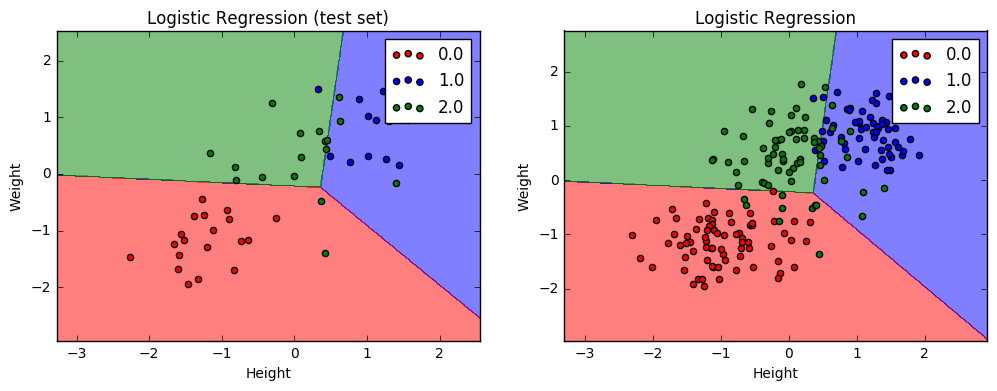

In [61]:
# Visualising the Test set and full set results
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lrmc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

fig.add_subplot(122)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lrmc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.show()

### SVM

In [62]:
svmMC = SVC(kernel = 'linear', C = 0.9)
svmMC.fit(X_train, y_train)

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred_SVMtrain = svmMC.predict(X_test)
confusion_matrix(y_test, y_pred_SVMtrain)

array([[19,  0,  0],
       [ 0, 12,  2],
       [ 1,  3, 13]])

In [64]:
y_pred_SVMFull = svmMC.predict(X)
confusion_matrix(y, y_pred_SVMFull)

array([[70,  0,  2],
       [ 0, 54,  6],
       [ 3,  8, 57]])

For the whole dataset there are 19 errors in prediction out of 200

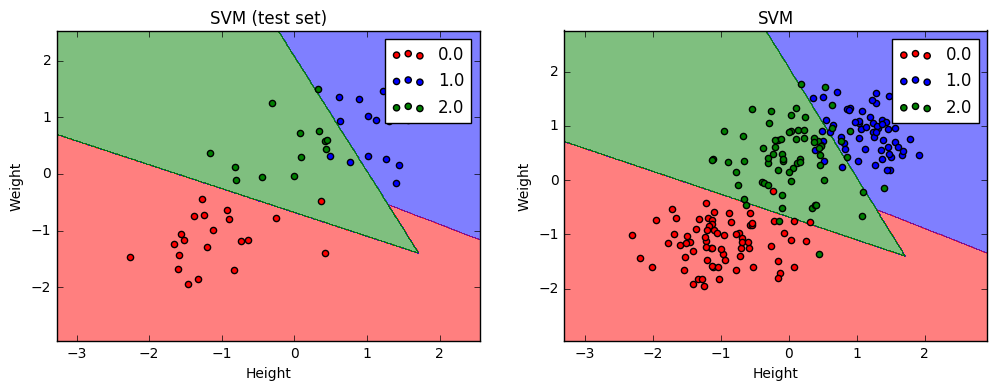

In [65]:
# Visualising the Test set and full set results
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
X_set, y_set = X_test, y_pred_LRMC
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svmMC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

fig.add_subplot(122)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svmMC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
plt.title('SVM')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.show()

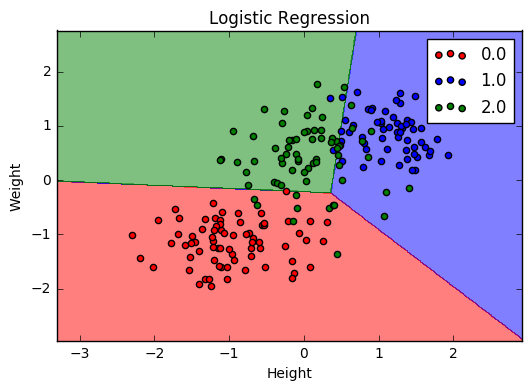

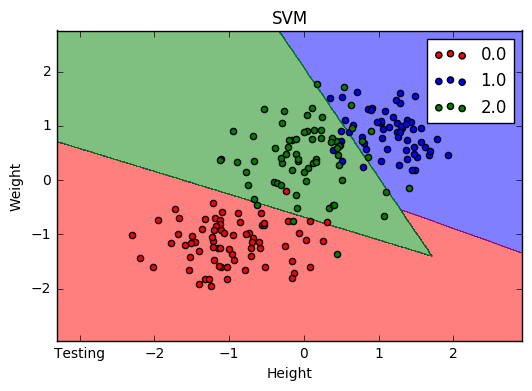

In [82]:
# Comparing results
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lrmc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

fig, ax = plt.subplots()
fig.add_subplot(121)
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svmMC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)


plt.title('SVM')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()

plt.show()

SVM performed better than Logistic regression in this multiclass problem. SVM got 181 correct classification points while Logistic Regression classified 175 points correctly.

The prediction can be improved as we didn't use any hyperparameters optimization algorithms. The hyperparameters used are the standard from library sklearn.
